In [1]:
import sys
stdout = sys.stdout
#get kerberos token for eos
import getpass, os
os.system("echo %s | kinit gandreas@CERN.CH" %getpass.getpass()) 

········


0

In [2]:
from vars_db import vars_db
branches = []
for branch in vars_db:
    if (vars_db[branch]['considered_for_MVA']):
        branches.append(branch)

In [16]:
#take the MC

import ROOT
import root_numpy
import numpy as np
import cuts

sys.stdout = stdout
MC_file = ROOT.TFile.Open("/eos/lhcb/wg/RD/Lb2Lll/MC/S28/2016/LbLemu_MC_BDT_xgboost1.root", "r")
MC_tuple = MC_file.Get("DecayTree")
MC_np = root_numpy.tree2array(tree=MC_tuple,
                                      branches=["Lb_M",
                                                "Lb_M01",
                                                "Lb_M02",
                                                "Lb_M03",
                                                "Lb_M12",
                                                "Lb_M13",                                                
                                                "Lb_M23",
                                                "xgboost1"]+branches,
                                      selection=cuts.Lb_Lemu_matching.GetTitle())

#adding column with q
from numpy.lib.recfunctions import append_fields

q2_12_col=np.array((MC_np['Lb_M12']**2))
MC_np = append_fields(MC_np, 'q2_12', q2_12_col)

q2_23_col=np.array((MC_np['Lb_M23']**2))
MC_np = append_fields(MC_np, 'q2_23', q2_23_col)

q2_13_col=np.array((MC_np['Lb_M13']**2))
MC_np = append_fields(MC_np, 'q2_13', q2_13_col)

In [4]:
#take the data (right sideband)
sys.stdout = stdout
#data_file = ROOT.TFile.Open("/eos/lhcb/wg/RD/Lb2Lll/data/S28/2016/LbLemu_2016_BDT_xgboost1.root", "r")
data_file = ROOT.TFile.Open("/eos/lhcb/user/g/gandreas/Lb2Lemu/tuples/S28/25102017/tot.root", "r")


data_tuple = data_file.Get("DecayTree")
data_np_right = root_numpy.tree2array(tree=data_tuple,
                                      branches=["Lb_M",
                                                "Lb_M01",
                                                "Lb_M02",
                                                "Lb_M03",
                                                "Lb_M12",
                                                "Lb_M13",                                                
                                                "Lb_M23",
                                                "Lb_M012_Subst2_e2pi",
                                                "xgboost1"]+branches,
                                selection=(cuts.Lb_Lemu_right_sideband).GetTitle())
##pid cuts are necessary to remove the LC contribution, that otherwise introduces a small correlation with the mass, because it is all in the left sideband


#adding column with q
from numpy.lib.recfunctions import append_fields

q2_12_col=np.array((data_np_right['Lb_M12']**2))
data_np_right = append_fields(data_np_right, 'q2_12', q2_12_col)

q2_23_col=np.array((data_np_right['Lb_M23']**2))
data_np_right = append_fields(data_np_right, 'q2_23', q2_23_col)

q2_13_col=np.array((data_np_right['Lb_M13']**2))
data_np_right = append_fields(data_np_right, 'q2_13', q2_13_col)

ReferenceError: attempt to access a null-pointer

Error in <TFile::TFile>: file /eos/lhcb/user/g/gandreas/Lb2Lemu/tuples/S28/25102017/tot.root does not exist


In [ ]:
#take the data (left sideband)
data_np_left = root_numpy.tree2array(tree=data_tuple,
                                      branches=["Lb_M",
                                                "Lb_M01",
                                                "Lb_M02",
                                                "Lb_M03",
                                                "Lb_M12",
                                                "Lb_M13",                                                
                                                "Lb_M23",
                                                "Lb_M012_Subst2_e2pi",
                                                "xgboost1"]+branches,
                                selection=(cuts.Lb_Lemu_left_sideband).GetTitle())
##pid cuts are necessary to remove the LC contribution, that otherwise introduces a small correlation with the mass, because it is all in the left sideband
#adding column with q
from numpy.lib.recfunctions import append_fields

q2_12_col=np.array((data_np_left['Lb_M12']**2))
data_np_left = append_fields(data_np_left, 'q2_12', q2_12_col)

q2_23_col=np.array((data_np_left['Lb_M23']**2))
data_np_left = append_fields(data_np_left, 'q2_23', q2_23_col)

q2_13_col=np.array((data_np_left['Lb_M13']**2))
data_np_left = append_fields(data_np_left, 'q2_13', q2_13_col)

In [ ]:
#take the data (both sidebands)
data_np = root_numpy.tree2array(tree=data_tuple,
                                      branches=["Lb_M",
                                                "Lb_M01",
                                                "Lb_M02",
                                                "Lb_M03",
                                                "Lb_M12",
                                                "Lb_M13",                                                
                                                "Lb_M23",
                                                "Lb_M012_Subst2_e2pi",
                                                "xgboost1"]+branches,
                                selection=(cuts.Lb_Lemu_sidebands).GetTitle())
##pid cuts are necessary to remove the LC contribution, that otherwise introduces a small correlation with the mass, because it is all in the left sideband

#adding column with q
from numpy.lib.recfunctions import append_fields

q2_12_col=np.array((data_np['Lb_M12']**2))
data_np = append_fields(data_np, 'q2_12', q2_12_col)

q2_23_col=np.array((data_np['Lb_M23']**2))
data_np = append_fields(data_np, 'q2_23', q2_23_col)

q2_13_col=np.array((data_np['Lb_M13']**2))
data_np = append_fields(data_np, 'q2_13', q2_13_col)

In [5]:
decay = "emu"
tag = '1'
plots_dir = 'plots/{0}/{1}/correlations/'.format(decay,tag)
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
    
from tools.corr_plot import corr_plot
import imp
import sys
imp.reload (sys.modules['tools.corr_plot'])

<module 'tools.corr_plot' from 'tools/corr_plot.pyc'>

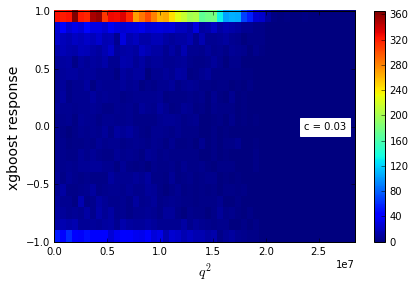

The correlation between q2_23 and xgboost1 is 0.0334810794412


/cvmfs/lhcb.cern.ch/lib/lcg/releases/LCG_87/pyanalysis/2.0/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/numpy-1.11.0-py2.7-linux-x86_64.egg/numpy/ma/core.py:2914: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a structured
array. This code will likely break in a future numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  if (obj.__array_interface__["data"][0]
/cvmfs/lhcb.cern.ch/lib/lcg/releases/LCG_87/pyanalysis/2.0/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/numpy-1.11.0-py2.7-linux-x86_64.egg/numpy/ma/core.py:2915: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a structured
array. This code will likely break in a future numpy release --
see numpy.diagonal or arrays.ind

In [8]:
#correlation with q2
x = corr_plot(MC_np, 'q2_23', 'xgboost1', [50, 20], x_label='$q^{2}$', y_label='xgboost response')
x.show_hist()
x.saveAs(plots_dir+"MC_corr_{0}_{1}.py".format('q2_23', 'xgboost1'))
x.saveAs(plots_dir+"MC_corr_{0}_{1}.pdf".format('q2_23', 'xgboost1'))

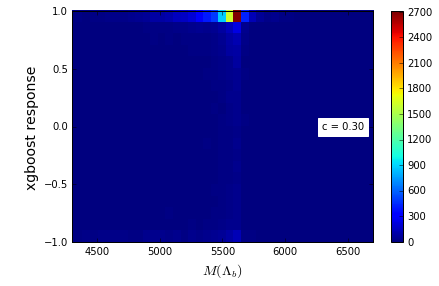

The correlation between Lb_M and xgboost1 is 0.301173191552


In [9]:
#correlation with mass of the Lambda_b (MC)
x = corr_plot(MC_np, 'Lb_M', 'xgboost1', [50, 20], x_min=4300, x_max=6700, x_label='$M(\Lambda_{b})$', y_label='xgboost response')
x.show_hist()
x.saveAs(plots_dir+"MC_corr_{0}_{1}.py".format('Lb_M', 'xgboost1'))
x.saveAs(plots_dir+"MC_corr_{0}_{1}.pdf".format('Lb_M', 'xgboost1'))

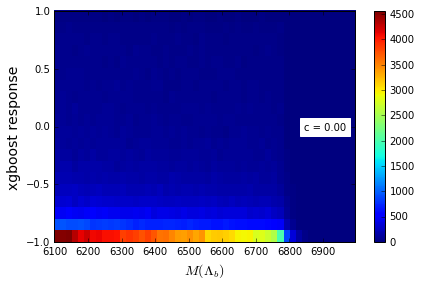

The correlation between Lb_M and xgboost1 is 0.00297736274834


In [10]:
#correlation with mass of the Lambda_b (data, right sideband)
x = corr_plot(data_np_right, 'Lb_M', 'xgboost1', [50, 20], x_label='$M(\Lambda_{b})$', y_label='xgboost response')
x.show_hist()
x.saveAs(plots_dir+"data_right_corr_{0}_{1}.py".format('Lb_M', 'xgboost1'))
x.saveAs(plots_dir+"data_right_corr_{0}_{1}.pdf".format('Lb_M', 'xgboost1'))

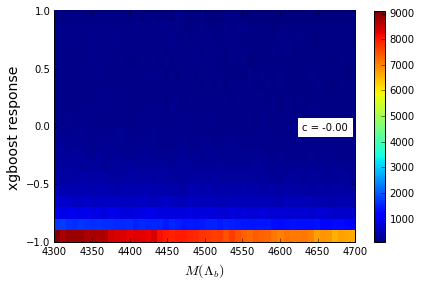

The correlation between Lb_M and xgboost1 is -0.00221767683742


In [11]:
#correlation with mass of the Lambda_b (data, right sideband)
x = corr_plot(data_np_left, 'Lb_M', 'xgboost1', [50, 20], x_label='$M(\Lambda_{b})$', y_label='xgboost response')
x.show_hist()
x.saveAs(plots_dir+"data_left_corr_{0}_{1}.py".format('Lb_M', 'xgboost1'))
x.saveAs(plots_dir+"data_left_corr_{0}_{1}.pdf".format('Lb_M', 'xgboost1'))

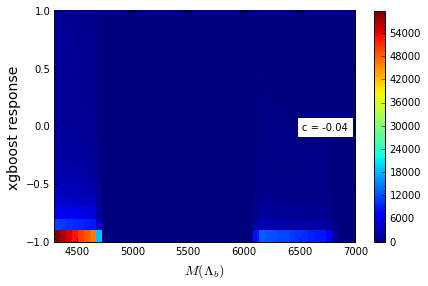

The correlation between Lb_M and xgboost1 is -0.043829105558


In [12]:
#correlation with mass of the Lambda_b (data, both sidebands)
x = corr_plot(data_np, 'Lb_M', 'xgboost1', [50, 20], x_label='$M(\Lambda_{b})$', y_label='xgboost response')
x.show_hist()
x.saveAs(plots_dir+"data_corr_{0}_{1}.py".format('Lb_M', 'xgboost1'))
x.saveAs(plots_dir+"data_corr_{0}_{1}.pdf".format('Lb_M', 'xgboost1'))

In [73]:
data_np.shape

(828421,)

In [ ]:
for branch in branches:
    x = corr_plot(MC_np, branch, 'q2_12', [vars_db[branch]['binning'][0], 20], *(vars_db[branch]['binning'][1:3]), y_min=-1, y_max=1, x_label=branch, y_label='xgboost response')
    x.show_hist()
    x.saveAs(plots_dir+"MC_corr_{0}_{1}.py".format(branch, 'q2_12'))
    x.saveAs(plots_dir+"MC_corr_{0}_{1}.pdf".format(branch, 'q2_12'))
    

In [32]:
assert all(isinstance(item, int) for item in [vars_db[branch]['binning'][0], 20])

In [62]:
a=vars_db[branch]['binning'][1:3]
a
assert all(isinstance(item, float) for item in a)